## Compare different methods for loading wav files

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import wave
from scipy.io import wavfile

# PCM encoded 16 bits per sample, sampling rate 44100 Hertz, stereo
filename = 'a2002011001-e02.wav'

## Read wavfile

In [20]:
sample_rate, audio = wavfile.read(filename)
n_samples = audio.shape[0]

## Plot waveform

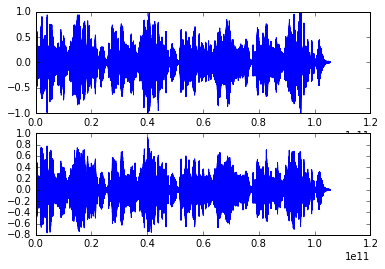

In [21]:
duration = sample_rate*n_samples
x = np.linspace(0, duration, n_samples)
audio = audio/32768.0

plt.subplot(211)
plt.plot(x, audio[:,0])
plt.subplot(212)
plt.plot(x, audio[:,1])
plt.show()

## Load wavfile function

In [24]:
def load_audio_from_wav(filename, bitrate=16, twos_comp=True):
    # read audio
    sample_rate, audio = wavfile.read(filename)
    
    # normalize to [-1, 1]
    max_code = 2**bitrate
    norm_factor = max_code/2.0
    offset = (not twos_comp)*max_code
    normed_audio = (audio - offset)/norm_factor
    
    return normed_audio, sample_rate

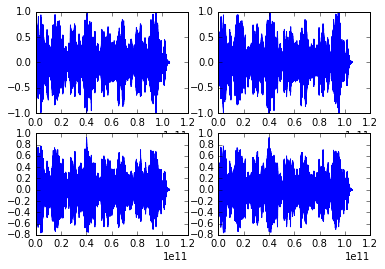

In [27]:
func_audio, _ = load_audio_from_wav(filename)
x = np.linspace(0, duration, n_samples)

plt.subplot(221)
plt.plot(x, audio[:,0])
plt.subplot(223)
plt.plot(x, audio[:,1])
plt.subplot(222)
plt.plot(x, func_audio[:,0])
plt.subplot(224)
plt.plot(x, func_audio[:,1])
plt.show()

## Randomly split into input and output segments

In [ ]:
def split_audio_into_segments(audio, n_x, n_y, n_segments):
    n_samples = audio.shape[0]
    n_points = n_x + n_y
    
    # for n_segments
    #   select random index from range(0, n_samples - n_points)
    #   copy x from first n_x samples and y from following n_y samples
    #   add x and y to lists
    # return x, y